# PROBLEM STATEMENT
- Data represents weekly 2018 retail scan data for National retail volume (units) and price.
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military.
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Objective
Do the data analysis part on this dataset and also perform the data visualization in order to understand
how millienials are buying avocados.

# Exploratory Data Analysis: 
- Seasonal Patterns: In this section we will focus on constant patterns that occur frequently from year to year and from month to month in both types of avocados conventional and organic.
- Cyclical Patterns: This section will require me to search deeper into what factors could have affected the price of avocados during those years (low supply, storms etc.) and will be interesting to see if any of those factors contributed to any significant price changes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 

In [2]:
data = pd.read_csv("avocado.csv")
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [7]:
data.shape

(18249, 14)

In [8]:
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [9]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
from collections import Counter
Counter(data['type'])

Counter({'conventional': 9126, 'organic': 9123})

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [58]:
data['month'] = data['Date'].dt.month

In [59]:
df = data[['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'type',
       'year', 'region','month']]

In [60]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume          type  year  \
0           0 2015-12-27          1.33      64236.62  conventional  2015   
1           1 2015-12-20          1.35      54876.98  conventional  2015   
2           2 2015-12-13          0.93     118220.22  conventional  2015   
3           3 2015-12-06          1.08      78992.15  conventional  2015   
4           4 2015-11-29          1.28      51039.60  conventional  2015   

   region  month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany     12  
4  Albany     11

In [61]:
df.set_index('Date',inplace=True)
df.head()

Unnamed: 0  AveragePrice  Total Volume          type  year  \
Date                                                                     
2015-12-27           0          1.33      64236.62  conventional  2015   
2015-12-20           1          1.35      54876.98  conventional  2015   
2015-12-13           2          0.93     118220.22  conventional  2015   
2015-12-06           3          1.08      78992.15  conventional  2015   
2015-11-29           4          1.28      51039.60  conventional  2015   

            region  month  
Date                       
2015-12-27  Albany     12  
2015-12-20  Albany     12  
2015-12-13  Albany     12  
2015-12-06  Albany     12  
2015-11-29  Albany     11

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   type          18249 non-null  object 
 4   year          18249 non-null  int64  
 5   region        18249 non-null  object 
 6   month         18249 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB


### Type of Avocado 
- Conventional
- Organic

In [62]:
conventional_df = df[['AveragePrice','Total Volume','year']][df['type']=='conventional']
organic_df = df[['AveragePrice','Total Volume','year']][df['type']=='organic']

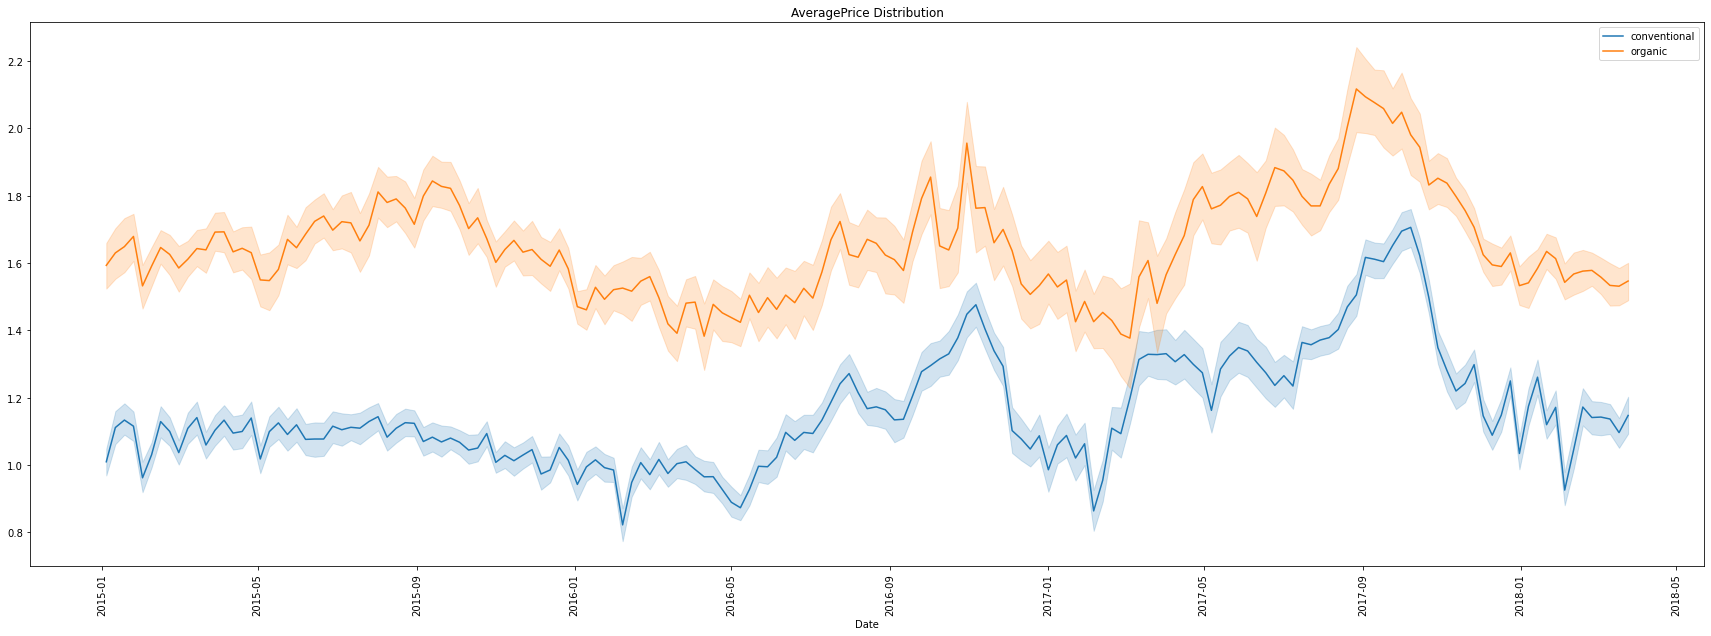

In [63]:
# Set the width and height of the figure
plt.figure(figsize=(30,10))

# Add title
plt.title("AveragePrice Distribution")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=conventional_df['AveragePrice'], label="conventional")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=organic_df['AveragePrice'], label="organic")

# Add label for horizontal axis
plt.xlabel("Date")
plt.xticks(rotation=90)

plt.show()

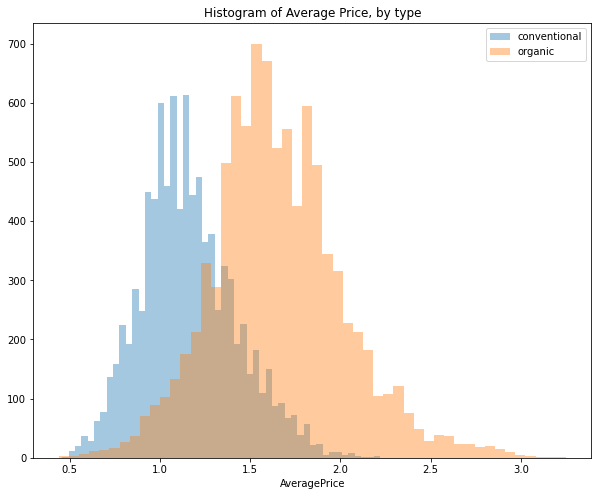

In [64]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Histograms for each species
sns.distplot(a=conventional_df['AveragePrice'], label="conventional", kde=False)
sns.distplot(a=organic_df['AveragePrice'], label="organic", kde=False)

# Add title
plt.title("Histogram of Average Price, by type")

# Force legend to appear
plt.legend()

plt.show()

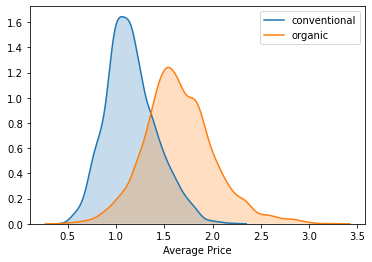

In [65]:
# KDE plot 
sns.kdeplot(data=conventional_df['AveragePrice'],label="conventional", shade=True)
sns.kdeplot(data=organic_df['AveragePrice'],label="organic", shade=True)
# Add label for horizontal axis
plt.xlabel("Average Price")

# Force legend to appear
plt.legend()
plt.show()

In [66]:
df.groupby(["type"])["AveragePrice","Total Volume"].mean()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



AveragePrice  Total Volume
type                                    
conventional      1.158040  1.653213e+06
organic           1.653999  4.781121e+04

### Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them. But it is likely that the price of avocado depends not only on the type.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



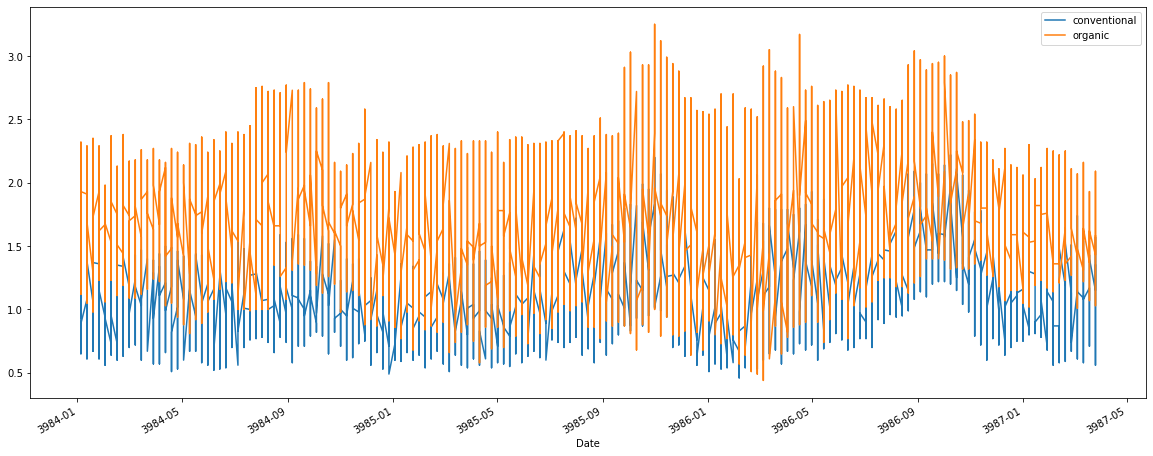

In [67]:
plt.figure( figsize = (20,8) ) 
conventional_df['AveragePrice'].plot(label='conventional')
organic_df['AveragePrice'].plot(label='organic')
plt.legend()
plt.show()

# Relationship between Prices and Total Volume:
In this phase we will analyze the impact supply has on the price of avocados as a whole. Normally, there is an inverse relationship between supply and prices. When there is an overproduction of avocados they will have a negative impact on the market price of avocados. Let's see if this is the case for both conventional and organic avocados.
- Conventional: At the end of 2017 we can see a large drop in prices, at the same time there is an increasing amount of volume of avocados in the market.
- Organic: Same happens with organic avocados, at the end of 2017 there is a big drop and we can see a huge increase in volume.
- Volume peaks: Notice how each volume peak is a signal for an upcoming drop in avocado prices.

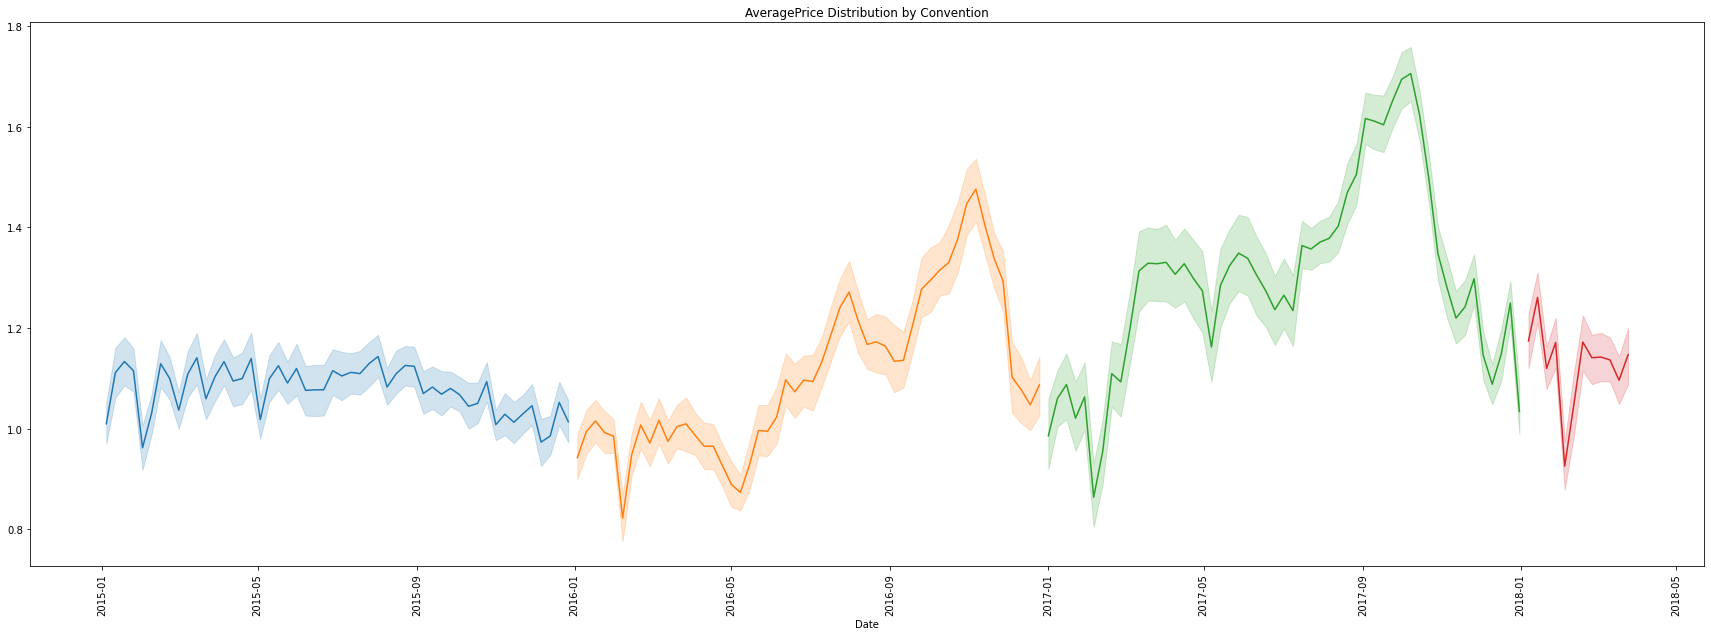

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(30,10))

# Add title
plt.title("AveragePrice Distribution by Convention")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=conventional_df['AveragePrice'][conventional_df['year']==2015])
sns.lineplot(data=conventional_df['AveragePrice'][conventional_df['year']==2016])
sns.lineplot(data=conventional_df['AveragePrice'][conventional_df['year']==2017])
sns.lineplot(data=conventional_df['AveragePrice'][conventional_df['year']==2018])
# Add label for horizontal axis
plt.xlabel("Date")
plt.xticks(rotation=90)

plt.show()

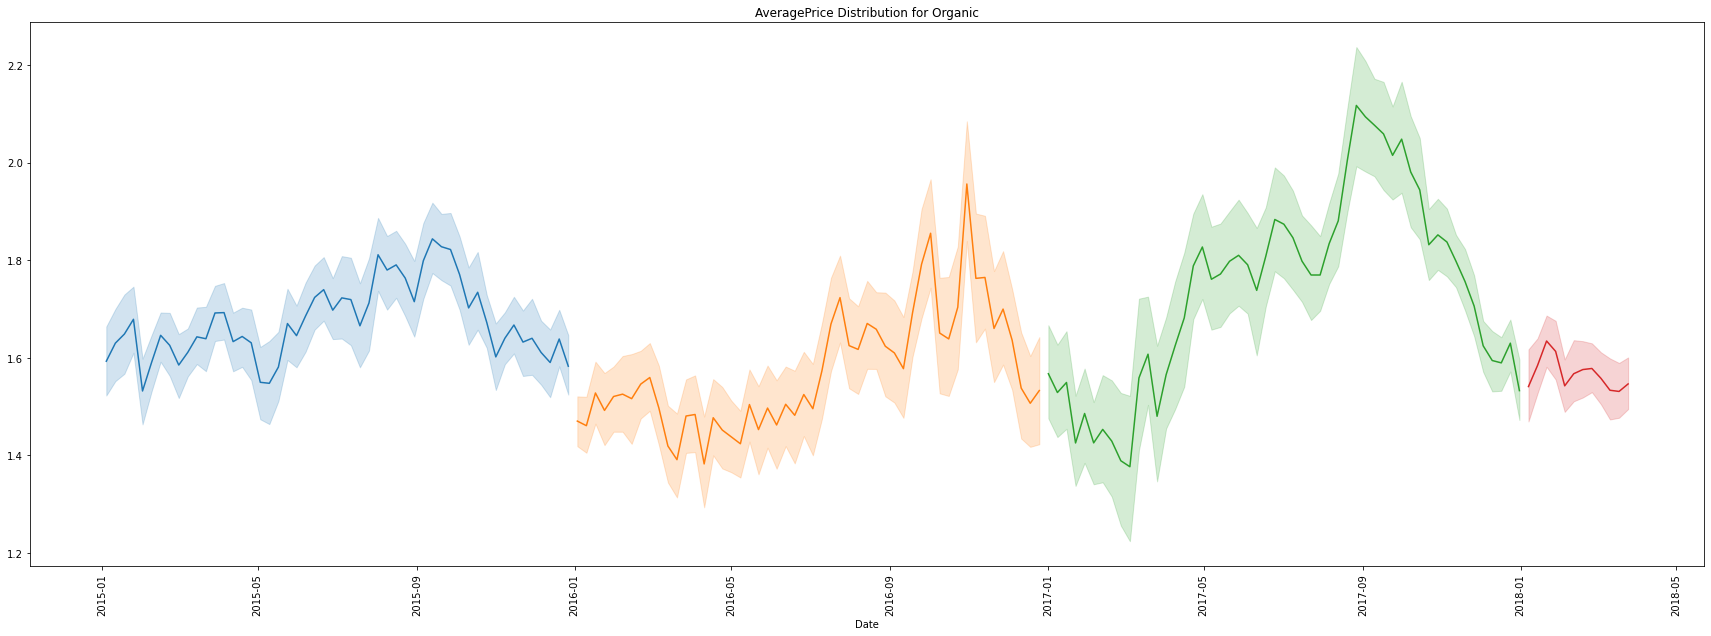

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(30,10))

# Add title
plt.title("AveragePrice Distribution for Organic")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=organic_df['AveragePrice'][organic_df['year']==2015])
sns.lineplot(data=organic_df['AveragePrice'][organic_df['year']==2016])
sns.lineplot(data=organic_df['AveragePrice'][organic_df['year']==2017])
sns.lineplot(data=organic_df['AveragePrice'][organic_df['year']==2018])
# Add label for horizontal axis
plt.xlabel("Date")
plt.xticks(rotation=90)

plt.show()

In [57]:
import plotly.offline as py
import plotly.graph_objs as go

Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



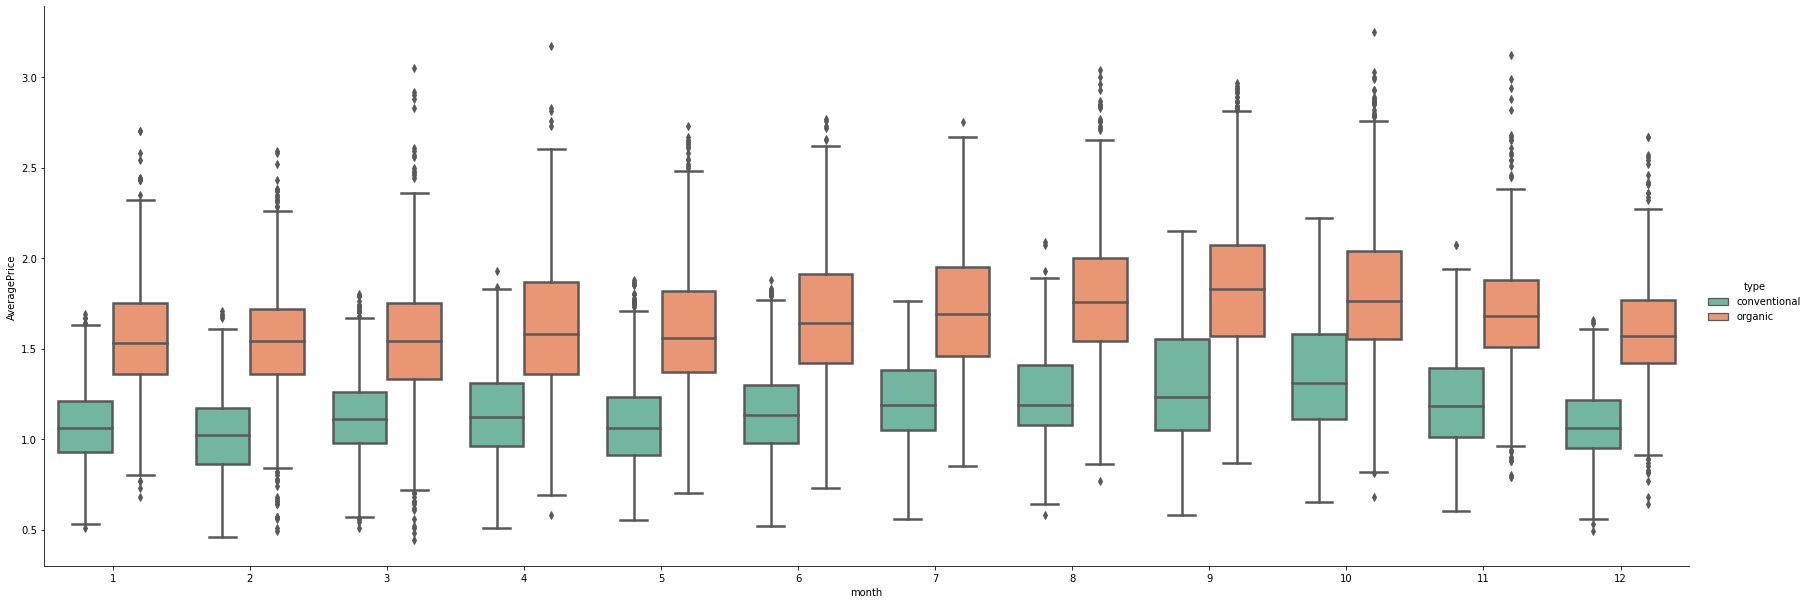

In [72]:
df['Month'] = df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                                   6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                                   11: 'November', 12: 'December'})


ax = sns.catplot(x="month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2")

#### Evaluating for Albany region

In [29]:
albany_df = df[df['region']=="Albany"]
albany_df.head()

Unnamed: 0  AveragePrice  Total Volume          type  year  region
Date                                                                          
2015-12-27           0          1.33      64236.62  conventional  2015  Albany
2015-12-20           1          1.35      54876.98  conventional  2015  Albany
2015-12-13           2          0.93     118220.22  conventional  2015  Albany
2015-12-06           3          1.08      78992.15  conventional  2015  Albany
2015-11-29           4          1.28      51039.60  conventional  2015  Albany

In [30]:
albany_df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

In [31]:
albany_df.head()

Unnamed: 0  AveragePrice  Total Volume          type  year  region
Date                                                                          
2015-12-27           0          1.33      64236.62  conventional  2015  Albany
2015-12-20           1          1.35      54876.98  conventional  2015  Albany
2015-12-13           2          0.93     118220.22  conventional  2015  Albany
2015-12-06           3          1.08      78992.15  conventional  2015  Albany
2015-11-29           4          1.28      51039.60  conventional  2015  Albany

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

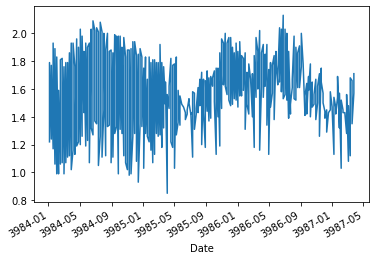

In [32]:
albany_df["AveragePrice"].plot()

In [33]:
# We could smooth the data with a rolling average.
albany_df = df.copy()[df['region']=="Albany"]
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

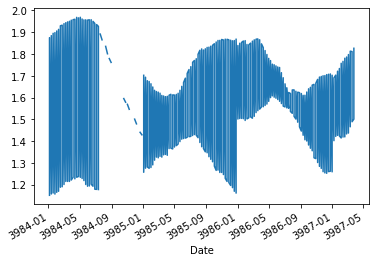

In [34]:
albany_df["AveragePrice"].rolling(25).mean().plot()

### Distribution plot of Average Price

Text(0.5, 1.0, 'AveragePrice Distribution')

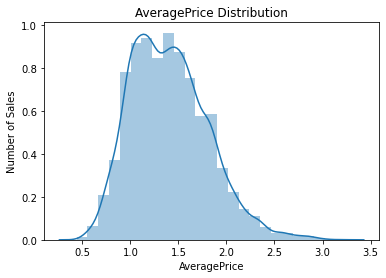

In [35]:
sns.distplot(df['AveragePrice'], bins = 25)
plt.xlabel("AveragePrice")
plt.ylabel("Number of Sales")
plt.title("AveragePrice Distribution")

In [36]:
print ("Skew is:", df['AveragePrice'].skew())
print("Kurtosis: %f" % df['AveragePrice'].kurt())

Skew is: 0.5803027378878419
Kurtosis: 0.325196


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

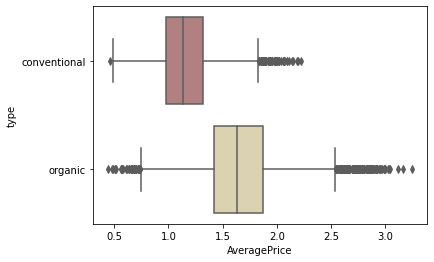

In [37]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink')

<AxesSubplot:xlabel='year', ylabel='count'>

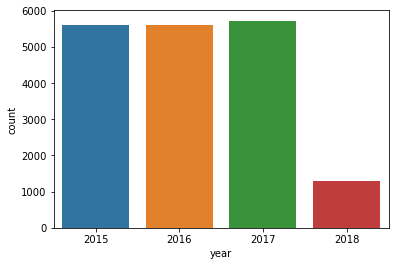

In [38]:
sns.countplot(df['year'])

In [39]:
print('Total number of Region: %d ' % df['region'].nunique())
print()
print('List of Region = ',df['region'].unique())

Total number of Region: 54 

List of Region =  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [40]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', 'type', 'year', 'region'], dtype='object')

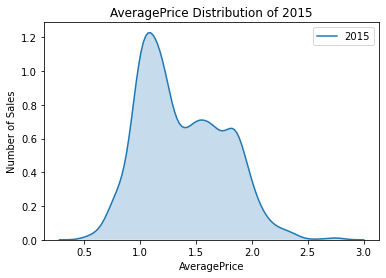

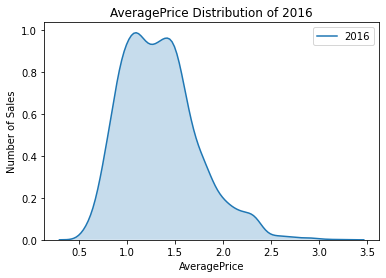

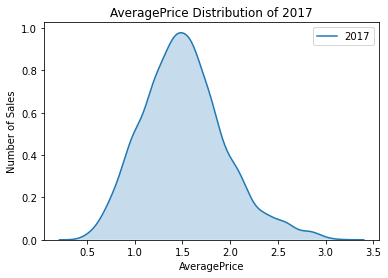

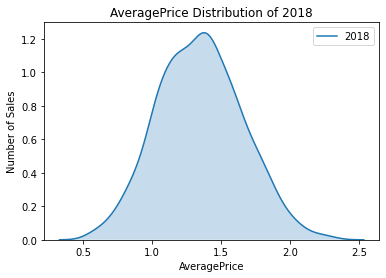

In [41]:
for i in df['year'].unique():
    sns.kdeplot(df['AveragePrice'][df['year']==i],shade=True,label=i)
    plt.xlabel("AveragePrice")
    plt.ylabel("Number of Sales")
    plt.title("AveragePrice Distribution of %d" %i)
    plt.show()

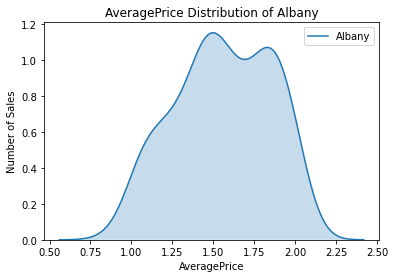

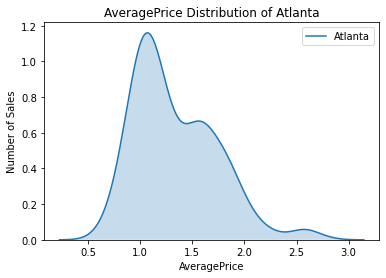

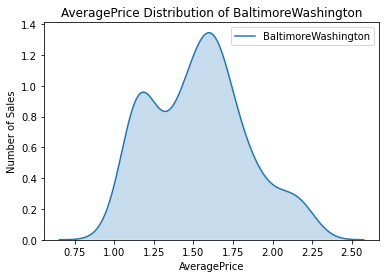

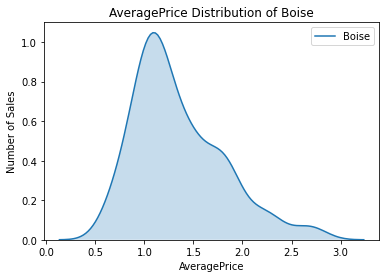

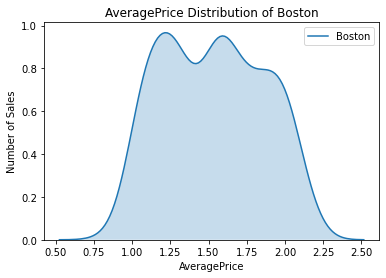

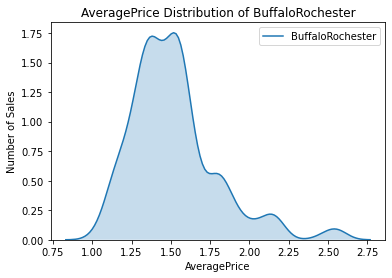

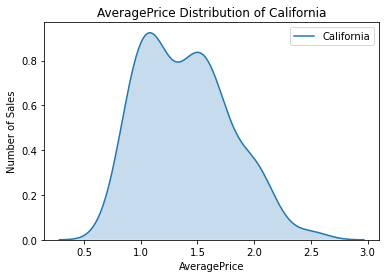

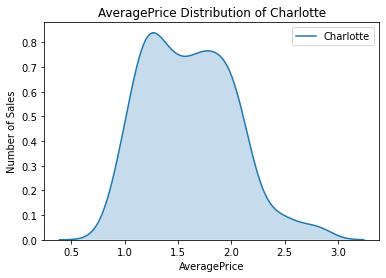

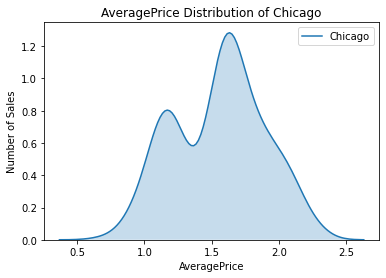

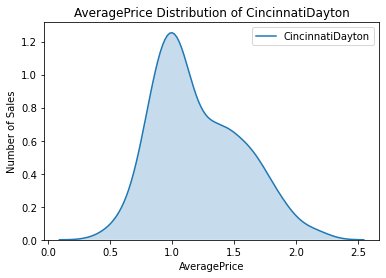

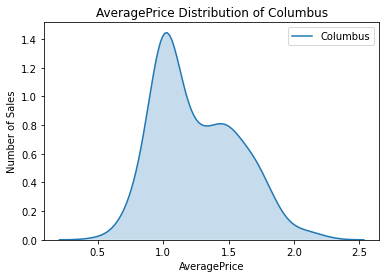

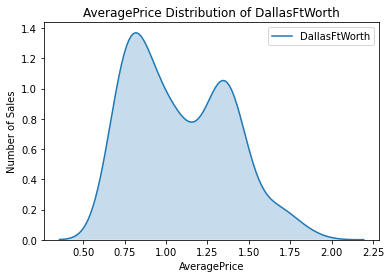

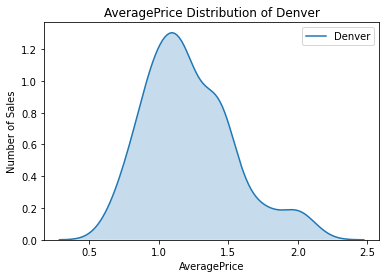

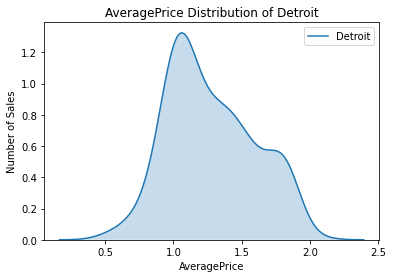

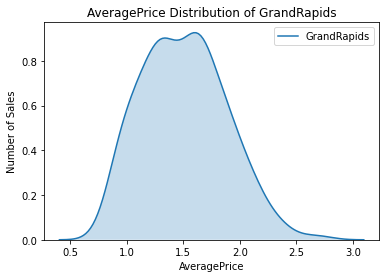

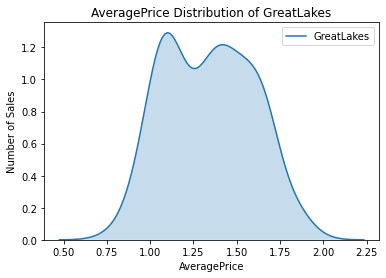

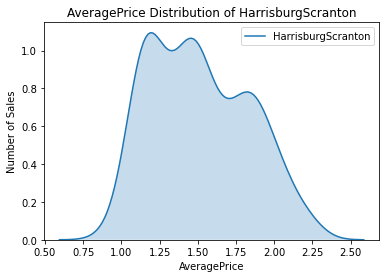

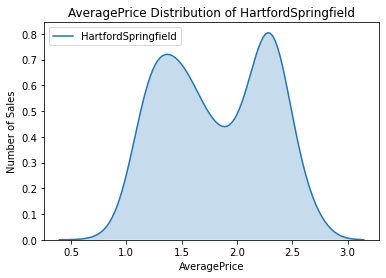

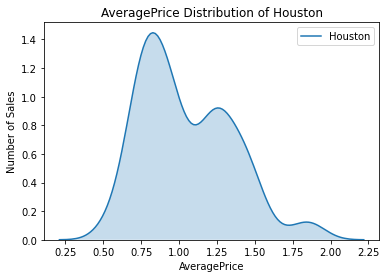

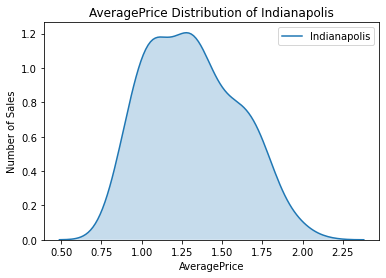

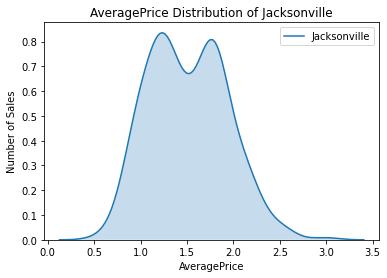

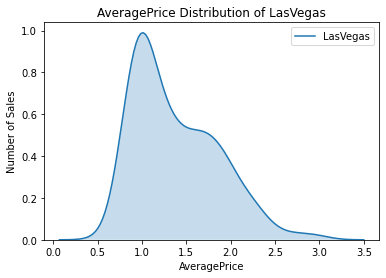

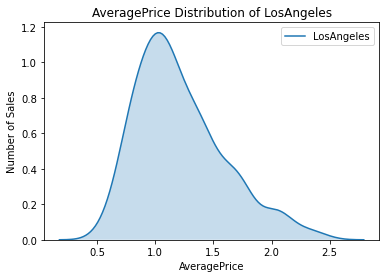

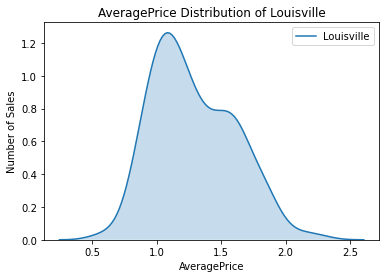

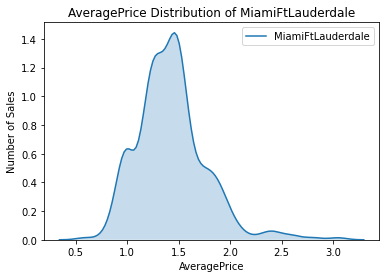

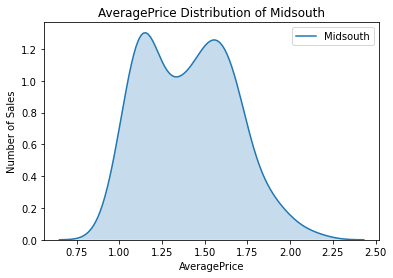

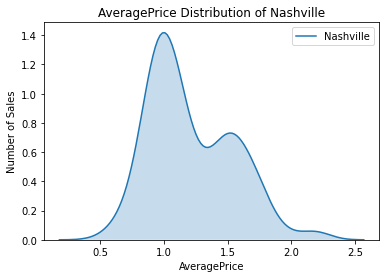

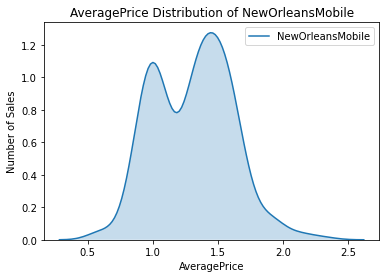

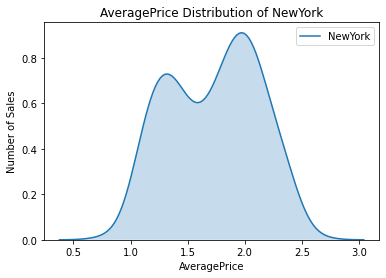

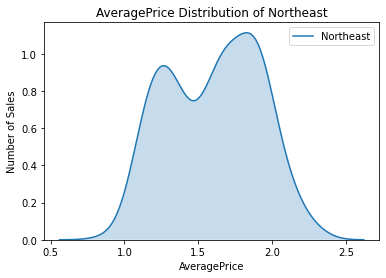

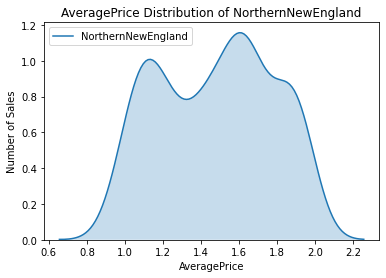

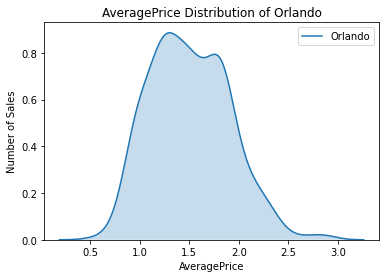

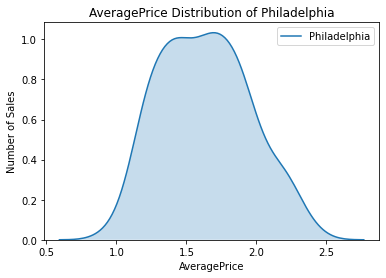

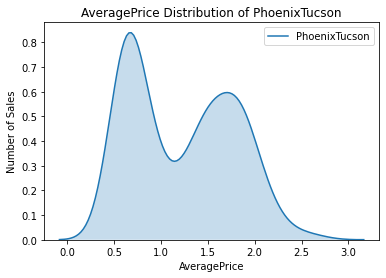

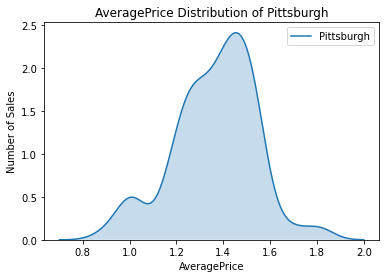

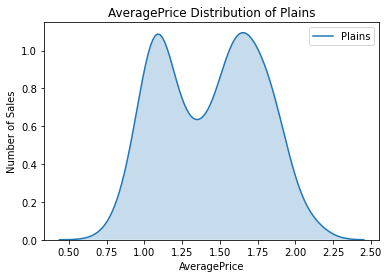

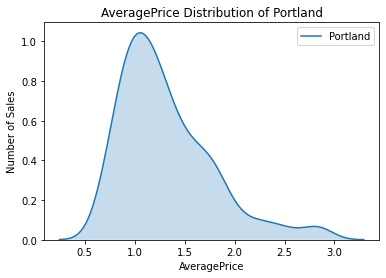

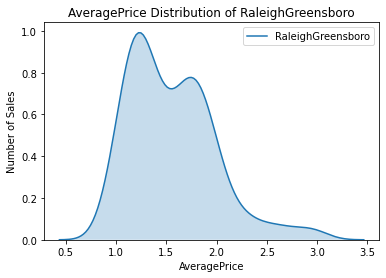

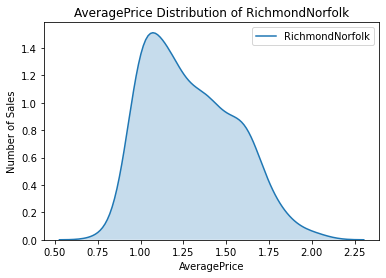

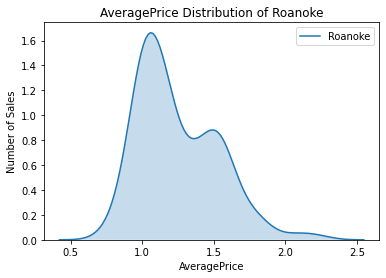

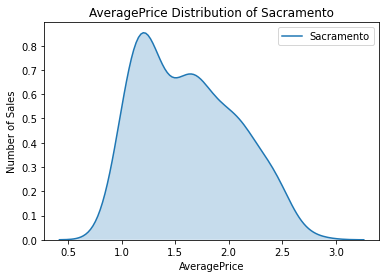

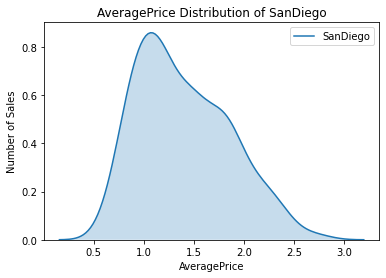

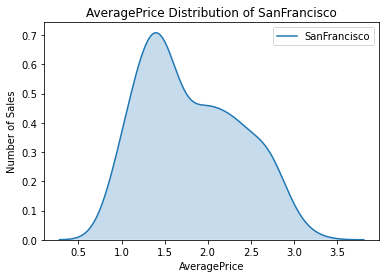

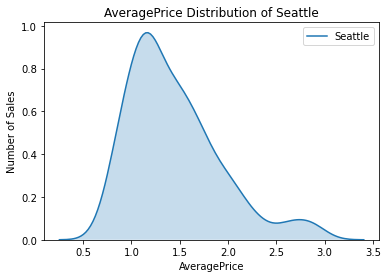

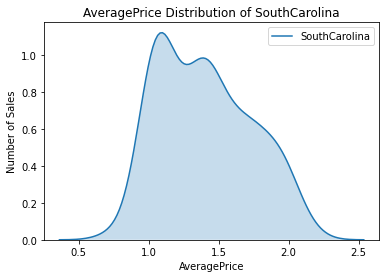

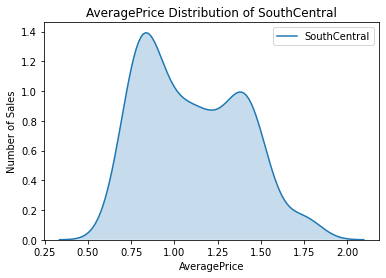

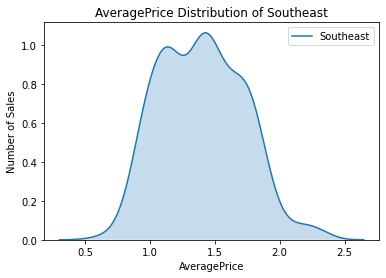

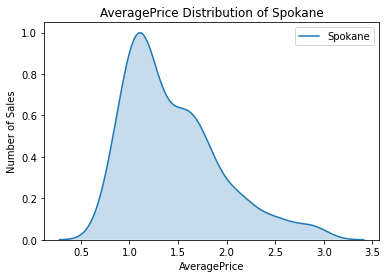

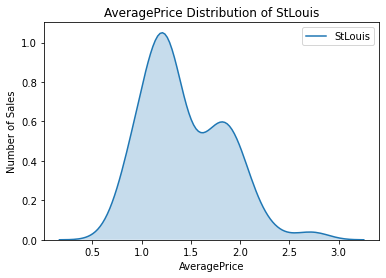

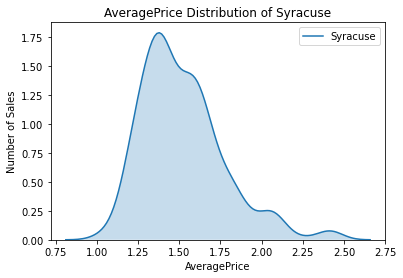

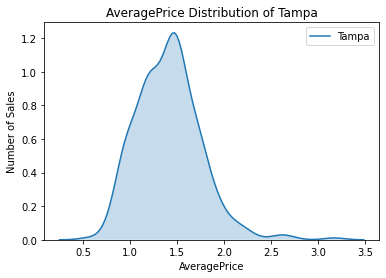

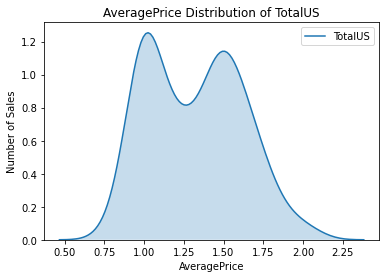

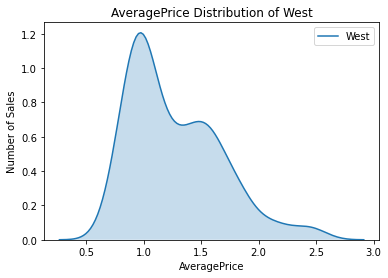

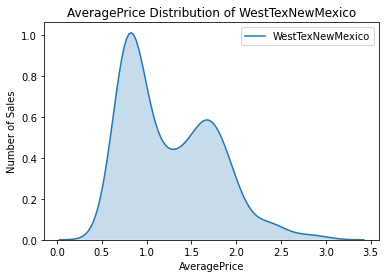

In [42]:
for i in df['region'].unique():
    sns.kdeplot(df['AveragePrice'][df['region']==i],shade=True,label=i)
    plt.xlabel("AveragePrice")
    plt.ylabel("Number of Sales")
    plt.title("AveragePrice Distribution of %s" % i)
    plt.show()

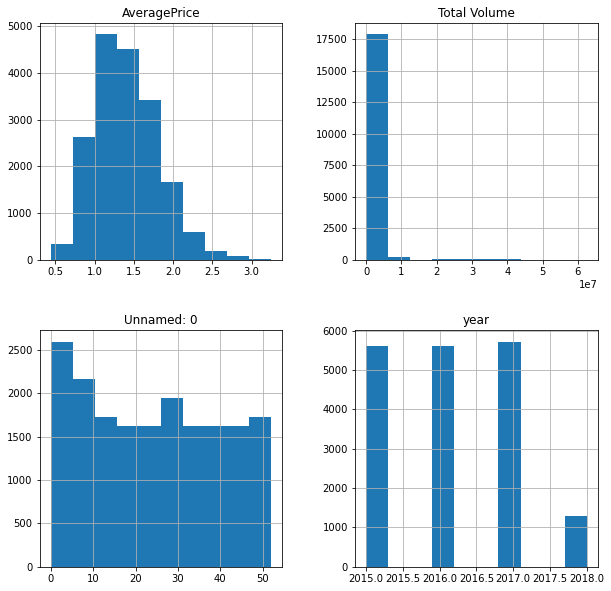

In [43]:
df.hist(figsize = (10,10))
plt.show()

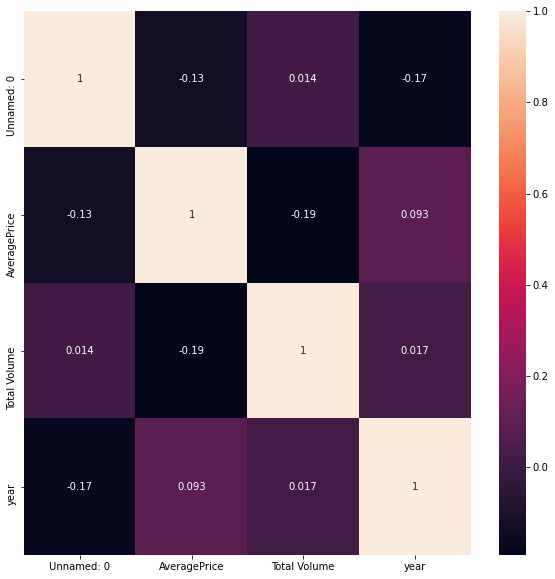

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Let's look at the price of avocado from different regions in different years. Let's start with organic avocados.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


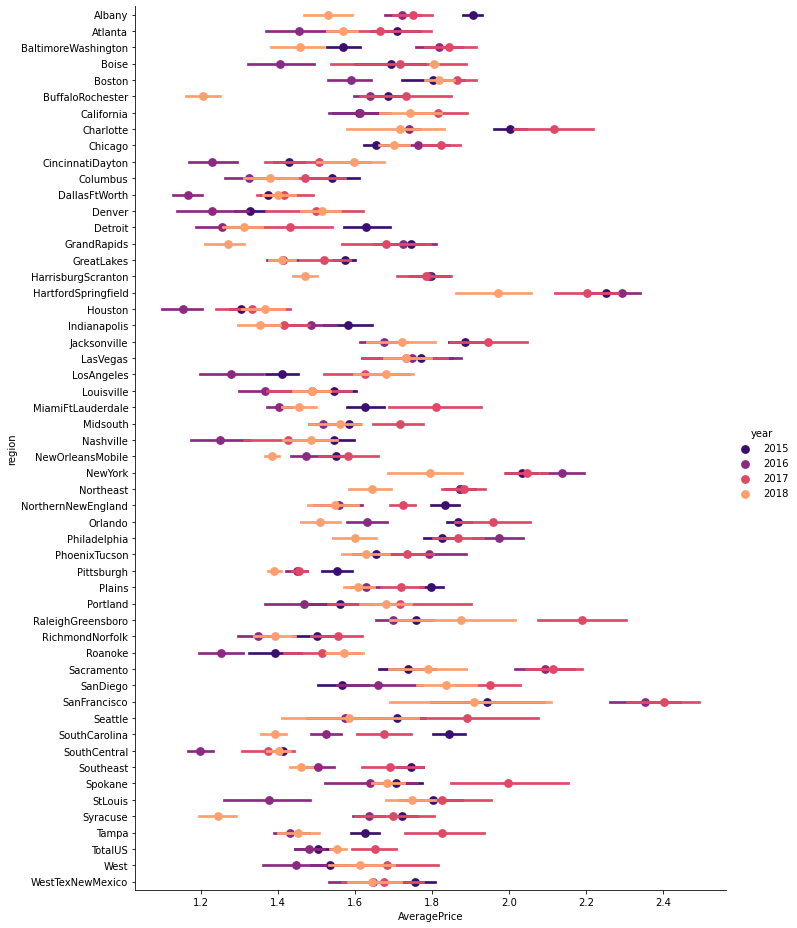

In [45]:
mask = data['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

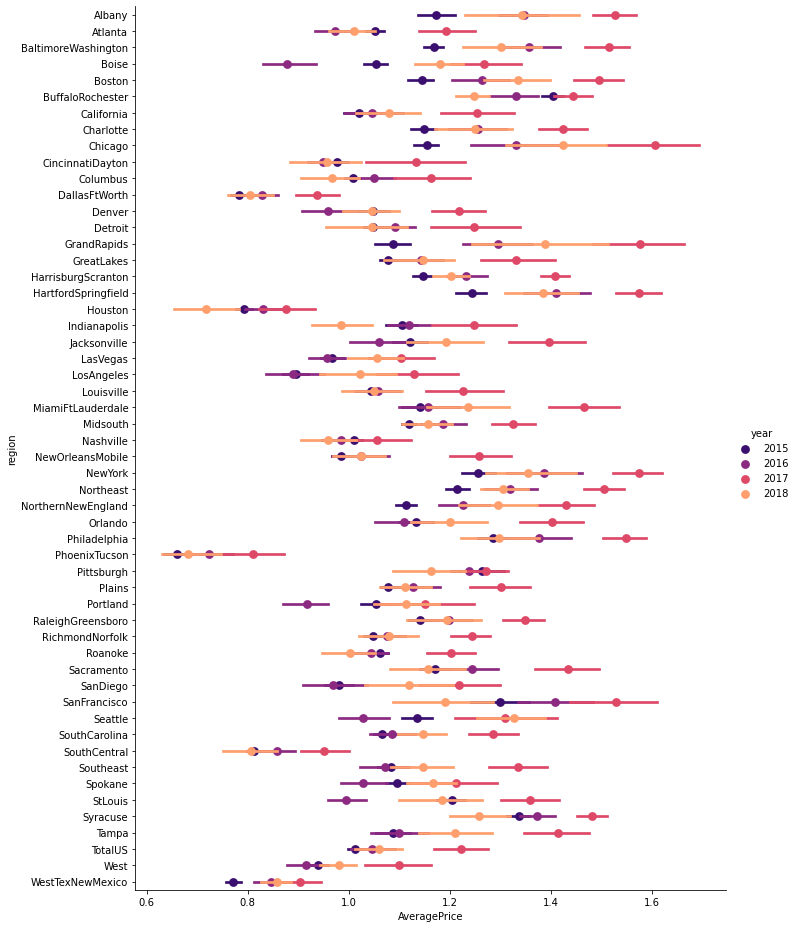

In [47]:
mask = data['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

# Time Series Analysis

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

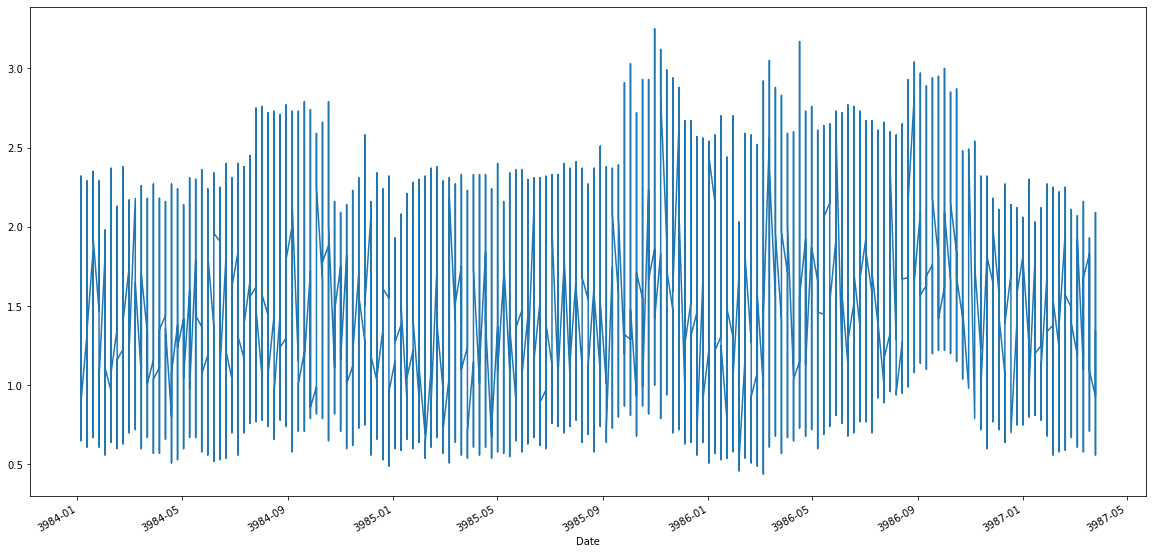

In [48]:
df['AveragePrice'].plot(figsize = (20,10))

In [49]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [50]:
test_result=adfuller(df['AveragePrice'])

In [51]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [52]:
adfuller_test(df['AveragePrice'])

ADF Test Statistic : -7.449623863175661
p-value : 5.7160690959321795e-11
#Lags Used : 45
Number of Observations Used : 18203
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

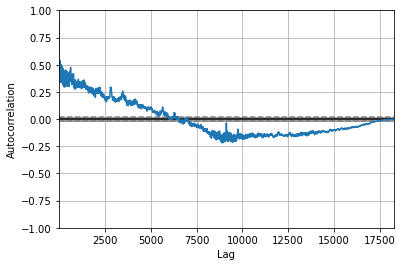

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AveragePrice'])
plt.show()

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

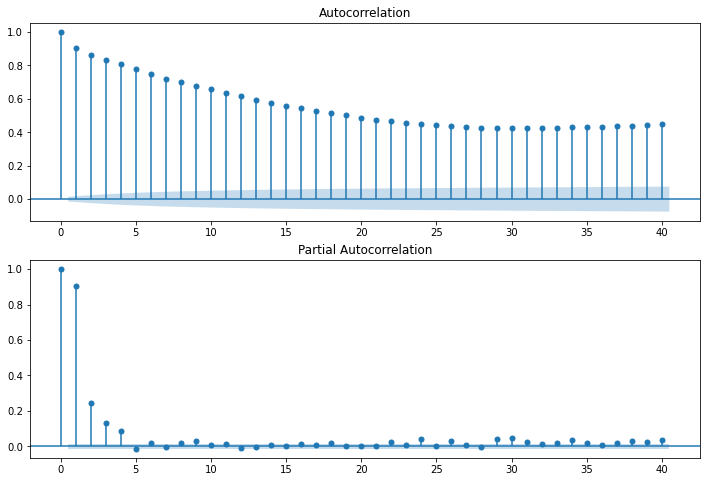

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['AveragePrice'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['AveragePrice'].iloc[13:],lags=40,ax=ax2)